# Create plots for the best time of year of movie release

IMPORTANT NOTE: Cannot be run on learn-env environment. Up-to-date pandas version is required to read the pickle file due to changes that were made when adjusting the budget for inflation. 

Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Reading the master dataset df and editing it according to plotting needs:

- worldwide_gross != 0
- add release month
- \>\$24M for inflation adjust budget 

In [2]:
master_df = pd.read_pickle('movie_master_dataset_with_inflation.pkl')
master_df = master_df[master_df['worldwide_gross'] != 0]
master_df['month'] = master_df['release_date'].dt.month
master_df = master_df[master_df['inf_adj_production_budget']>=2.4e7]

## Median ROI Barplot for Each Month

Simple version of the plot to see all the data before making it presentation ready in the subsequent code cell

Text(0.5, 1.0, 'Median ROI of All Genres for Each Month')

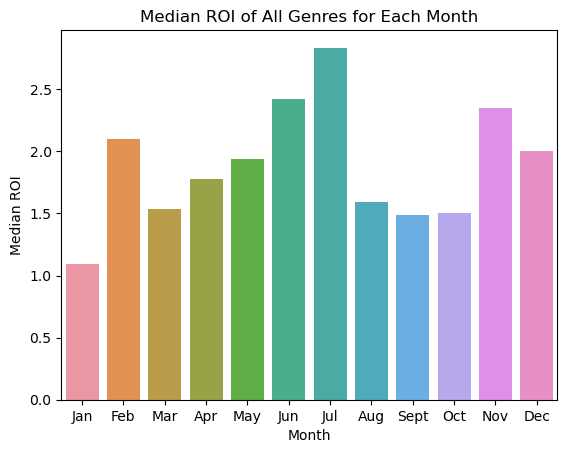

In [3]:
ax = sns.barplot(data=master_df, x = 'month', y='ROI', ci=None)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel('Median ROI')
ax.set_xlabel('Month')
ax.set_title('Median ROI of All Genres for Each Month')

## Median ROI of Combined Action, Adventure, Comedy for Each Month

### Formatted to be saved as a presentation-ready figure. Not meant to be seen clearly in jupyter notebook

Style colors (hex): '#eb5600', '#c2882b', '#6aa4c8'

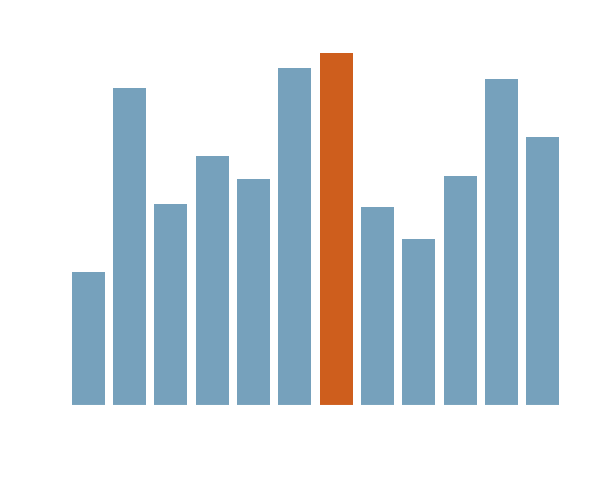

In [4]:
# Setting a style that works well for setting a figure that is ready to present (not easily visible here)
# If wanting to see the axes style information dict    -->   print(sns.axes_style())
sns.set_style(rc={'axes.edgecolor': 'w','text.color': 'w','xtick.color': 'w','ytick.color': 'w', 'axes.labelcolor':'w'})


# The dataframe with only Adventure, Action, and Drama films
act_adv_com_df = master_df[(master_df['Adventure'] == True) 
                           | (master_df['Action'] == True) 
                           | (master_df['Drama'] == True)].copy()

# Producing the barplot for ROI of each month
bar = sns.barplot(data= act_adv_com_df,
                  x = 'month', y='ROI', ci=None, 
                  palette = ['#6aa4c8', '#6aa4c8', '#6aa4c8','#6aa4c8', '#6aa4c8', 
                             '#6aa4c8', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8'])

# Fixing/Adding labels and titles
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
bar.set_xticklabels(months, rotation=90, horizontalalignment='center')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Median ROI', fontsize=15)
plt.title('Monthly Median ROI: Action + Adventure + Comedy', fontsize=16)

# Showing and saving the figure
fig = bar.get_figure()
fig.savefig('median_roi_by_year_act_adv_com.png', transparent=True, bbox_inches='tight', pad_inches=.15, dpi=300)